
TICA and clustering with CN- of 80:20 KA sims
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from collections import Counter
import mdtraj as md
#from CN_functions import *
#from gen_dtraj_functions import *

Some useful inhouse functions
------

In [4]:
#from plot_functions import *
import pickle

Read in the data
------

In [5]:
tica_lags = [1] 
tica_dim = 3
clust_dim = 3
nclust_max = 1000
dtraj = np.genfromtxt('dtraj_tica3D.dat')
# Y = []
# tica_corr = []
# for lag in tica_lags:
#     Y.append(np.load('../TICA/Y_ticadim-'+str(tica_dim)+'_ticalag-'+str(lag)+'.npy'))
#     tica_corr.append(np.load('../TICA/tica_corr_lag-'+str(lag)+'.npy'))
    #  clustering
    #with open('../TICA/clustering_regspaceB_ticadim-'+str(tica_dim)+'_ticalag-'+str(lag)+'_nclust-'+str(nclust_max)+'_clustdim-'+str(clust_dim)+'.pkl', 'rb') as f:
    #    clustering = pickle.load(f)
#Y_pca = np.load('Y_B_nclust-200_pcadim-10_clustdim-3.npy')

In [6]:
np.save('tica_lag',tica_lags[0])
np.save('tica_dim',tica_dim)
np.save('clust_dim',clust_dim)
np.save('nclust_max',nclust_max)

In [7]:
microstates = np.genfromtxt('microstates')

In [8]:
# from copy import deepcopy
# tica_lag = 1 #tica_lags[0]
# N_dim = Y[0][0].shape[1]
# Y_trim = []
# for traj in range(len(Y[0])):
#     Y_trim.append( Y[0][traj][::tica_lag,0:N_dim] )

In [9]:
np.unique(microstates).shape

(22,)

In [10]:
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


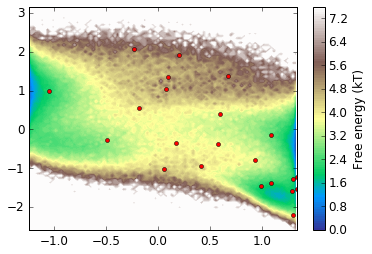

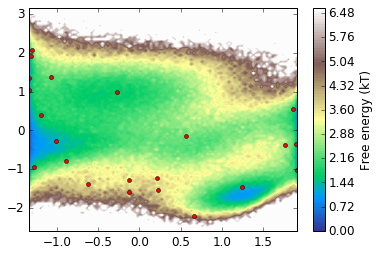

In [11]:
for lag in range(len(tica_lags)):
    for dim in range(clust_dim-1):
        fig, ax = mplt.plot_free_energy(dtraj[:,dim+1], dtraj[:,0],cmap='terrain')
        for state in range(len(np.unique(microstates))):
            plot(state_pos[dim+1][state],state_pos[0][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
#             plt.xlim([-1,1])
#             plt.ylim([-1,1])
        if dim == 0:
            plt.savefig('fig_bond-bond.eps', format='eps', dpi=800)
        else:
            plt.savefig('fig_bond-angle.eps', format='eps', dpi=800)
        # plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
        plt.show()

In [12]:
len(np.unique(microstates))
np.unique(microstates).astype(int)

array([    1,     7,    11,    44,  3368,  3512,  3672,  3825,  3828,
        3949,  5153,  5431,  5830,  8043,  8395,  8418, 10208, 10683,
       11024, 11234, 14844, 49388])

cut is 0.5
nclust = 4


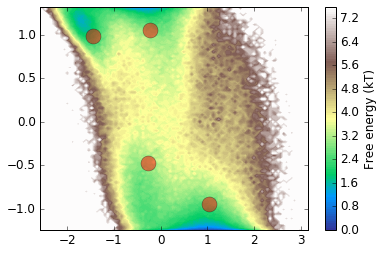

cut is 0.8
nclust = 3


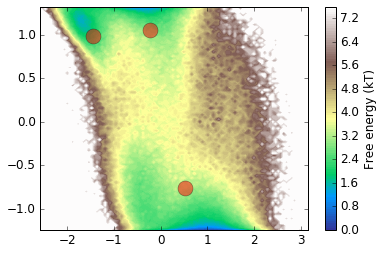

cut is 0.9
nclust = 2


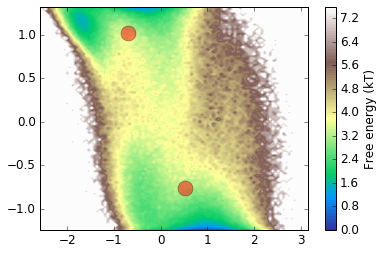

In [13]:
Q_cut = [0.500,0.8,0.9]
for cut in Q_cut:
    print 'cut is '+str(cut)
    microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
    print 'nclust = '+str(np.unique(microstates).shape[0])
    #
    state_pos = [[] for dim in range(clust_dim)]
    for state in np.unique(microstates):
        state_frames = np.where(microstates==state)[0]
        for dim in range(clust_dim):
            state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
    dim = 0
    for lag in range(len(tica_lags)):
        fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
        for state in range(len(np.unique(microstates))):
            #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
            plot(state_pos[0][state],state_pos[1][state], linewidth=0, marker='o', markersize=15, color='red',alpha=0.5) #, markerfacecolor='none')

    #         plt.xlim([0.2,0.6])
    #         plt.ylim([-1.5,-0.5])
    plt.show()

In [14]:
# Let's see what these clusters correspond to

In [15]:
# dtrajs = []
# path = '../traj/vals.txt'
# dtrajs.append(np.genfromtxt(path)[:,1:])

In [16]:
# concat the trajs
# dtrajs_concat = np.vstack(dtrajs)

In [17]:
# use the highest res rep
cut = 0.500
microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#microstates = np.genfromtxt('microstates')

In [18]:
clust_num_OLD = np.unique(microstates).astype(int)
clust_num_OLD

array([ 1,  7, 11, 44])

In [19]:
from copy import deepcopy
microstates_renum = deepcopy(microstates)
for state_ind,state in enumerate(clust_num_OLD):
    states = np.where(microstates==state)[0]
    microstates_renum[states] = state_ind

In [20]:
np.savetxt('mpp_traj_'+"{0:.3f}".format(cut)+'_renum.dat',microstates_renum.astype(int),fmt='%d')
#np.savetxt('microstates_renum.dat',microstates_renum.astype(int),fmt='%d')

In [21]:
np.unique(microstates_renum)

array([0., 1., 2., 3.])

In [22]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [23]:
#! dtraj is already shifted
# from copy import deepcopy
# dtraj_shift = deepcopy(dtraj)
# for traj in range(len(dtraj)):
#     dtraj_shift[traj] = (dtraj[traj]-mu)/sd
dtraj_coord = np.load('dtraj_OG.npy')
dtraj_coord_14 = np.load('../DPCA_w14/dtraj_OG.npy')

In [24]:
dtraj_coord_14.shape

(500010, 3)

In [25]:
mu_state = []
mu_state_coord = []
sd_state = []
sd_state_coord = []
for state in np.unique(microstates_renum).astype(int):
    state_frs = np.where(microstates_renum==state)[0]
    mu_state.append(np.mean(dtraj[state_frs],axis=0))
    sd_state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
    mu_state_coord.append([])
    sd_state_coord.append([])
    for dim in range(3):
        if (dim==1): # need to apply minimum image convention
            mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
            d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
            dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
            dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
            dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
            dtraj_dih_min = np.zeros(len(state_frs))
            dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
            for fr in range(len(state_frs)):
                dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
            mu_state_coord[state].append(np.mean(dtraj_dih_min)) 
            sd_state_coord[state].append(np.sqrt(np.var(dtraj_dih_min)))
        else:
            mu_state_coord[state].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
            sd_state_coord[state].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

In [28]:
# testing
# state_frs = np.where(microstates_renum==1)[0]
# plt.hist(dtraj_coord_14[state_frs][:,1])
# mu_tmp = np.mean(dtraj_coord_14[state_frs][:,1])
# d0 = (dtraj_coord_14[state_frs][:,1]-mu_tmp)**2
# dp = (dtraj_coord_14[state_frs][:,1]-mu_tmp+360.)**2
# dm = (dtraj_coord_14[state_frs][:,1]-mu_tmp-360.)**2
# dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
# dtraj_dih_min = np.zeros(len(state_frs))
# dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,1],dtraj_coord_14[state_frs][:,1]+360,dtraj_coord_14[state_frs][:,1]-360))
# for fr in range(len(state_frs)):
#     dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
# plt.hist(dtraj_dih_min)

print sd_state_coord[0]

[4.6059225159258235, 21.74335786295824, 0.05117208568857481]


(array([  370.,  1830.,  5979., 10007., 13360., 20961., 28048., 22312.,
        16723.,  9672.]),
 array([-47.991 , -28.0313,  -8.0716,  11.8881,  31.8478,  51.8075,
         71.7672,  91.7269, 111.6866, 131.6463, 151.606 ]),
 <a list of 10 Patch objects>)

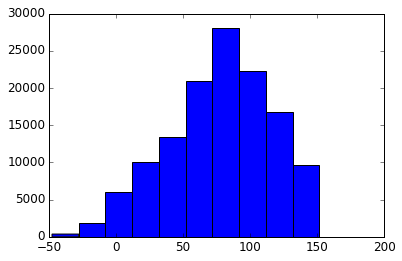

In [29]:
plt.hist(dtraj_dih_min)

In [30]:
np.savetxt('mu_state.txt',mu_state,fmt='%f')
np.savetxt('sd_state.txt',sd_state,fmt='%f')
np.savetxt('mu_state_coord.txt',mu_state_coord,fmt='%f')
np.savetxt('sd_state_coord.txt',sd_state_coord,fmt='%f')

In [31]:
# # let's calc specifically for the 2-state model
# mu_state_2state = []
# sd_state_2state = []
# mu_state_coord_2state = []
# sd_state_coord_2state = []
# # state0 => 0 or 3
# state_frs = np.where(microstates_renum==0)[0]
# state_frs = np.hstack((state_frs,np.where(microstates_renum==3)[0]))
# mu_state_2state.append(np.mean(dtraj[state_frs],axis=0))
# sd_state_2state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
# mu_state_coord_2state.append([])
# sd_state_coord_2state.append([])
# for dim in range(3):
#     if (dim==1): # need to apply minimum image convention
#         mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
#         d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
#         dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
#         dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
#         dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
#         dtraj_dih_min = np.zeros(len(state_frs))
#         dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
#         for fr in range(len(state_frs)):
#             dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
#         mu_state_coord_2state[0].append(np.mean(dtraj_dih_min)) 
#         sd_state_coord_2state[0].append(np.sqrt(np.var(dtraj_dih_min)))
#     else:
#         mu_state_coord_2state[0].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
#         sd_state_coord_2state[0].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

# # state0 => 1 or 2
# state_frs = np.where(microstates_renum==1)[0]
# state_frs = np.hstack((state_frs,np.where(microstates_renum==2)[0]))
# mu_state_2state.append(np.mean(dtraj[state_frs],axis=0))
# sd_state_2state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
# mu_state_coord_2state.append([])
# sd_state_coord_2state.append([])
# for dim in range(3):
#     if (dim==1): # need to apply minimum image convention
#         mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
#         d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
#         dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
#         dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
#         dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
#         dtraj_dih_min = np.zeros(len(state_frs))
#         dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
#         for fr in range(len(state_frs)):
#             dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
#         mu_state_coord_2state[1].append(np.mean(dtraj_dih_min)) 
#         sd_state_coord_2state[1].append(np.sqrt(np.var(dtraj_dih_min)))
#     else:
#         mu_state_coord_2state[1].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
#         sd_state_coord_2state[1].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

In [32]:
# np.savetxt('mu_state_2state.txt',mu_state_2state,fmt='%f')
# np.savetxt('sd_state_2state.txt',sd_state_2state,fmt='%f')
# np.savetxt('mu_state_coord_2state.txt',mu_state_coord_2state,fmt='%f')
# np.savetxt('sd_state_coord_2state.txt',sd_state_coord_2state,fmt='%f')

In [33]:
N_clust = len(np.unique(microstates_renum))

In [34]:
# let's use the original trajectory
dtraj_OG = np.load('dtraj_OG.npy')
N_feat = dtraj_OG.shape[1]
print N_feat
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates)):
    state_frs = np.where(microstates==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj_OG[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

2


In [35]:
# sort the clusters in order of the first TICA component
import operator
state_pos = []
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    state_pos.append( np.mean( dtraj[:,0][state_frames] ) )

state_prop = []
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_prop.append([])
    state_prop[state_ind].append(state_pos[state_ind])
    state_prop[state_ind].append(state_ind)
sorted_list = sorted(state_prop, key=operator.itemgetter(0), reverse=False)
state_map = np.array(sorted_list)[:,-1].astype(int)
state_map_r = np.zeros(state_map.shape[0]).astype(int)
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_map_r[state_ind] = np.where(state_map==state_ind)[0]
# models = np.array(models)[model_map]
# model_nm = np.array(model_nm)[model_map]
# models_float = np.array(models_float)[model_map]
# print models
# print model_nm
# print models_float
#models_float
print state_map_r
np.save('state_map_r',state_map_r)
np.save('state_map',state_map)

[0 3 1 2]


In [36]:
# define the color schemes for the mss_sets
from matplotlib.pyplot import *
mycmap = plt.cm.rainbow
mss_colors = []
mycmap_max = N_clust
mycmap_min = 0
# extract all colors from the map
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
# create the new map
mycmap = mycmap.from_list('Custom cmap', mycmaplist, mycmap.N)
# define the bins and normalize
bounds = np.linspace(mycmap_min,mycmap_max,mycmap.N)
norm = matplotlib.colors.BoundaryNorm(bounds, mycmap.N)
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
dx = bounds[1] - bounds[0]
mss_colors = []
for state in range(N_clust):
    grid = int( (state - mycmap_min)/dx + 0.5 )
    mss_colors.append(mycmaplist[grid])

In [37]:
# print 'cut is '+str(cut)
microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#microstates = np.genfromtxt('microstates')
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

nclust = 4


In [38]:
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state_map_r[state]],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state_map_r[state]+1, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

nclust = 4


In [39]:
np.save('state_pos',state_pos)
np.save('state_colors',mss_colors)

In [40]:
state_pos = np.array(state_pos)

In [41]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [42]:
state_pos[:,0]

array([-1.45969404,  0.98404784,  1.24029265])

In [43]:
#state_pos*sd
dihs = np.zeros(state_pos.shape[1])
import math
for state in range(state_pos.shape[1]):
    pos_OG = state_pos[:,state]*sd + mu
    print pos_OG
    dihs[state] = math.atan2(pos_OG[1],pos_OG[2])
    print dihs

[92.87812127  0.72759553  0.58244806]
[0.89574401 0.         0.         0.        ]
[123.41607881  -0.75894415  -0.38863105]
[ 0.89574401 -2.0440517   0.          0.        ]
[107.27157363  -0.39530555  -0.79640311]
[ 0.89574401 -2.0440517  -2.68085836  0.        ]
[108.04164231   0.78000932   0.15753449]
[ 0.89574401 -2.0440517  -2.68085836  1.37151217]


In [44]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.1,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

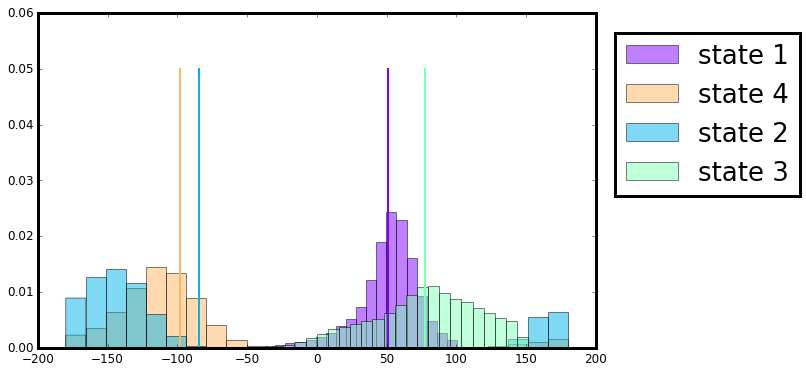

In [45]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.05,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [46]:
# remove symmetrically identical states

In [47]:
microstates_renum2 = deepcopy(microstates_renum)
# microstates_renum2[np.where(microstates_renum2==3)[0]] = 2
# microstates_renum2[np.where(microstates_renum2==4)[0]] = 3
# microstates_renum2[np.where(microstates_renum2==5)[0]] = 4
# microstates_renum2[np.where(microstates_renum2==6)[0]] = 4

In [48]:
np.savetxt('microstates_renum2.dat',microstates_renum2.astype(int),fmt='%d')

In [49]:
for state in range(np.unique(microstates_renum2).shape[0]):
    print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_renum2==state)[0]))/len(microstates_renum2))

state 0 has pop 0.167432651347
state 1 has pop 0.35025099498
state 2 has pop 0.22379752405
state 3 has pop 0.258518829623


In [50]:
N_clust = np.unique(microstates_renum2).shape[0]
N_feat = dtraj.shape[1]
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates_renum2)):
    state_frs = np.where(microstates_renum2==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

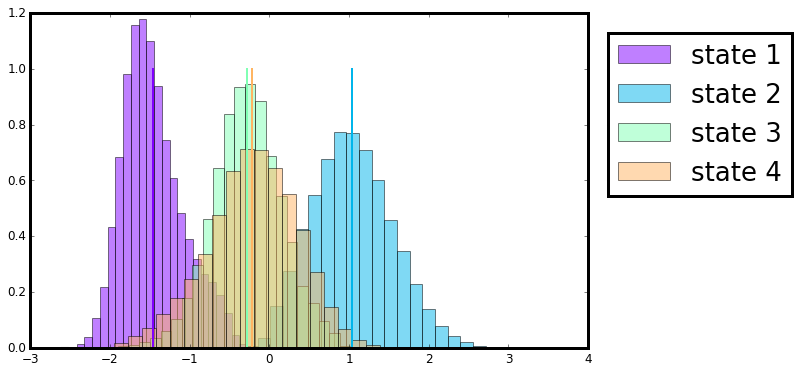

In [51]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

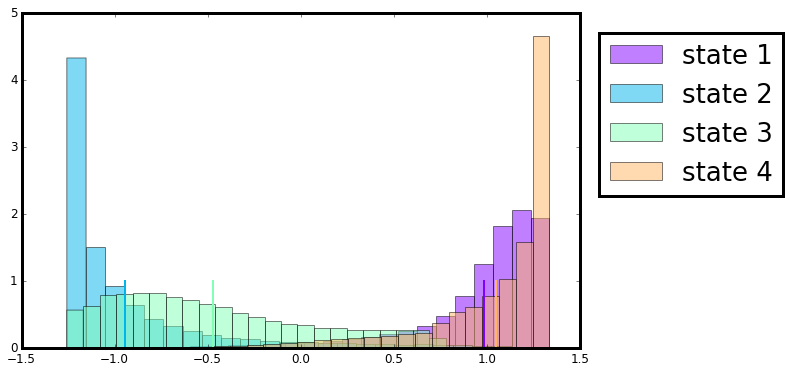

In [52]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [53]:
# everything by hand for Figs
feat_ind = 2
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [54]:
# Now, let's combine states directly from these definitions

In [55]:
# state_pos = np.array(state_pos)

In [56]:
# microstates_2states = deepcopy(microstates_renum2)
# microstates_2states[np.where(microstates_renum2==2)[0]] = 1
# microstates_2states[np.where(microstates_renum2==3)[0]] = 0
# np.savetxt('microstates_2states.dat',microstates_2states.astype(int),fmt='%d')

In [57]:
# for state in range(np.unique(microstates_2states).shape[0]):
#     print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_2states==state)[0]))/len(microstates_2states))

In [58]:
# Now the 3-state rep
cut = 0.800
microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#microstates = np.genfromtxt('microstates')

In [59]:
clust_num_OLD = np.unique(microstates).astype(int)
clust_num_OLD

array([ 1,  7, 44])

In [60]:
from copy import deepcopy
microstates_renum = deepcopy(microstates)
for state_ind,state in enumerate(clust_num_OLD):
    states = np.where(microstates==state)[0]
    microstates_renum[states] = state_ind

In [61]:
np.savetxt('mpp_traj_'+"{0:.3f}".format(cut)+'_renum.dat',microstates_renum.astype(int),fmt='%d')
#np.savetxt('microstates_renum.dat',microstates_renum.astype(int),fmt='%d')

In [62]:
np.unique(microstates_renum)

array([0., 1., 2.])

In [63]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [64]:
#! dtraj is already shifted
# from copy import deepcopy
# dtraj_shift = deepcopy(dtraj)
# for traj in range(len(dtraj)):
#     dtraj_shift[traj] = (dtraj[traj]-mu)/sd
dtraj_coord = np.load('dtraj_OG.npy')
dtraj_coord_14 = np.load('../DPCA_w14/dtraj_OG.npy')

In [65]:
dtraj_coord_14.shape

(500010, 3)

In [66]:
mu_state = []
mu_state_coord = []
sd_state = []
sd_state_coord = []
for state in np.unique(microstates_renum).astype(int):
    state_frs = np.where(microstates_renum==state)[0]
    mu_state.append(np.mean(dtraj[state_frs],axis=0))
    sd_state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
    mu_state_coord.append([])
    sd_state_coord.append([])
    for dim in range(3):
        if (dim==1): # need to apply minimum image convention
            mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
            d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
            dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
            dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
            dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
            dtraj_dih_min = np.zeros(len(state_frs))
            dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
            for fr in range(len(state_frs)):
                dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
            mu_state_coord[state].append(np.mean(dtraj_dih_min)) 
            sd_state_coord[state].append(np.sqrt(np.var(dtraj_dih_min)))
        else:
            mu_state_coord[state].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
            sd_state_coord[state].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

In [67]:
# testing
# state_frs = np.where(microstates_renum==1)[0]
# plt.hist(dtraj_coord_14[state_frs][:,1])
# mu_tmp = np.mean(dtraj_coord_14[state_frs][:,1])
# d0 = (dtraj_coord_14[state_frs][:,1]-mu_tmp)**2
# dp = (dtraj_coord_14[state_frs][:,1]-mu_tmp+360.)**2
# dm = (dtraj_coord_14[state_frs][:,1]-mu_tmp-360.)**2
# dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
# dtraj_dih_min = np.zeros(len(state_frs))
# dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,1],dtraj_coord_14[state_frs][:,1]+360,dtraj_coord_14[state_frs][:,1]-360))
# for fr in range(len(state_frs)):
#     dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
# plt.hist(dtraj_dih_min)

print sd_state_coord

[[4.6059225159258235, 21.74335786295824, 0.05117208568857481], [9.775811718973676, 35.40042519646653, 0.060525614634638195], [6.8783762565242155, 38.442524316460876, 0.07881836691986747]]


(array([  370.,  1830.,  5979., 10007., 13360., 20961., 28048., 22312.,
        16723.,  9672.]),
 array([-47.991 , -28.0313,  -8.0716,  11.8881,  31.8478,  51.8075,
         71.7672,  91.7269, 111.6866, 131.6463, 151.606 ]),
 <a list of 10 Patch objects>)

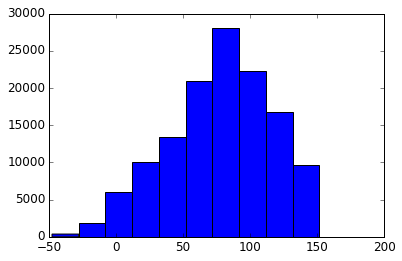

In [68]:
plt.hist(dtraj_dih_min)

In [69]:
np.savetxt('mu_state_3state.txt',mu_state,fmt='%f')
np.savetxt('sd_state_3state.txt',sd_state,fmt='%f')
np.savetxt('mu_state_coord_3state.txt',mu_state_coord,fmt='%f')
np.savetxt('sd_state_coord_3state.txt',sd_state_coord,fmt='%f')

In [70]:
# # let's calc specifically for the 2-state model
# mu_state_2state = []
# sd_state_2state = []
# mu_state_coord_2state = []
# sd_state_coord_2state = []
# # state0 => 0 or 3
# state_frs = np.where(microstates_renum==0)[0]
# state_frs = np.hstack((state_frs,np.where(microstates_renum==3)[0]))
# mu_state_2state.append(np.mean(dtraj[state_frs],axis=0))
# sd_state_2state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
# mu_state_coord_2state.append([])
# sd_state_coord_2state.append([])
# for dim in range(3):
#     if (dim==1): # need to apply minimum image convention
#         mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
#         d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
#         dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
#         dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
#         dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
#         dtraj_dih_min = np.zeros(len(state_frs))
#         dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
#         for fr in range(len(state_frs)):
#             dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
#         mu_state_coord_2state[0].append(np.mean(dtraj_dih_min)) 
#         sd_state_coord_2state[0].append(np.sqrt(np.var(dtraj_dih_min)))
#     else:
#         mu_state_coord_2state[0].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
#         sd_state_coord_2state[0].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

# # state0 => 1 or 2
# state_frs = np.where(microstates_renum==1)[0]
# state_frs = np.hstack((state_frs,np.where(microstates_renum==2)[0]))
# mu_state_2state.append(np.mean(dtraj[state_frs],axis=0))
# sd_state_2state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
# mu_state_coord_2state.append([])
# sd_state_coord_2state.append([])
# for dim in range(3):
#     if (dim==1): # need to apply minimum image convention
#         mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
#         d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
#         dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
#         dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
#         dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
#         dtraj_dih_min = np.zeros(len(state_frs))
#         dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
#         for fr in range(len(state_frs)):
#             dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
#         mu_state_coord_2state[1].append(np.mean(dtraj_dih_min)) 
#         sd_state_coord_2state[1].append(np.sqrt(np.var(dtraj_dih_min)))
#     else:
#         mu_state_coord_2state[1].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
#         sd_state_coord_2state[1].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

In [71]:
# np.savetxt('mu_state_2state.txt',mu_state_2state,fmt='%f')
# np.savetxt('sd_state_2state.txt',sd_state_2state,fmt='%f')
# np.savetxt('mu_state_coord_2state.txt',mu_state_coord_2state,fmt='%f')
# np.savetxt('sd_state_coord_2state.txt',sd_state_coord_2state,fmt='%f')

In [72]:
N_clust = len(np.unique(microstates_renum))

In [73]:
# let's use the original trajectory
dtraj_OG = np.load('dtraj_OG.npy')
N_feat = dtraj_OG.shape[1]
print N_feat
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates)):
    state_frs = np.where(microstates==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj_OG[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

2


In [74]:
# sort the clusters in order of the first TICA component
import operator
state_pos = []
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    state_pos.append( np.mean( dtraj[:,0][state_frames] ) )

state_prop = []
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_prop.append([])
    state_prop[state_ind].append(state_pos[state_ind])
    state_prop[state_ind].append(state_ind)
sorted_list = sorted(state_prop, key=operator.itemgetter(0), reverse=False)
state_map = np.array(sorted_list)[:,-1].astype(int)
state_map_r = np.zeros(state_map.shape[0]).astype(int)
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_map_r[state_ind] = np.where(state_map==state_ind)[0]
# models = np.array(models)[model_map]
# model_nm = np.array(model_nm)[model_map]
# models_float = np.array(models_float)[model_map]
# print models
# print model_nm
# print models_float
#models_float
print state_map_r
np.save('state_map_r_3state',state_map_r)
np.save('state_map_3state',state_map)

[0 2 1]


In [75]:
# define the color schemes for the mss_sets
from matplotlib.pyplot import *
mycmap = plt.cm.rainbow
mss_colors = []
mycmap_max = N_clust
mycmap_min = 0
# extract all colors from the map
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
# create the new map
mycmap = mycmap.from_list('Custom cmap', mycmaplist, mycmap.N)
# define the bins and normalize
bounds = np.linspace(mycmap_min,mycmap_max,mycmap.N)
norm = matplotlib.colors.BoundaryNorm(bounds, mycmap.N)
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
dx = bounds[1] - bounds[0]
mss_colors = []
for state in range(N_clust):
    grid = int( (state - mycmap_min)/dx + 0.5 )
    mss_colors.append(mycmaplist[grid])

In [76]:
# print 'cut is '+str(cut)
microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#microstates = np.genfromtxt('microstates')
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

nclust = 3


nclust = 3


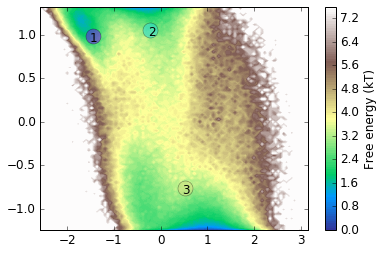

In [77]:
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state_map_r[state]],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state_map_r[state]+1, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

In [78]:
np.save('state_pos_3state',state_pos)
np.save('state_colors_3state',mss_colors)

In [79]:
state_pos = np.array(state_pos)

In [80]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [81]:
state_pos[:,0]

array([-1.45969404,  0.98404784,  1.24029265])

In [82]:
#state_pos*sd
dihs = np.zeros(state_pos.shape[1])
import math
for state in range(state_pos.shape[1]):
    pos_OG = state_pos[:,state]*sd + mu
    print pos_OG
    dihs[state] = math.atan2(pos_OG[1],pos_OG[2])
    print dihs

[92.87812127  0.72759553  0.58244806]
[0.89574401 0.         0.        ]
[117.12201104  -0.61717666  -0.54760433]
[ 0.89574401 -2.29653541  0.        ]
[108.04164231   0.78000932   0.15753449]
[ 0.89574401 -2.29653541  1.37151217]


In [83]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.1,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

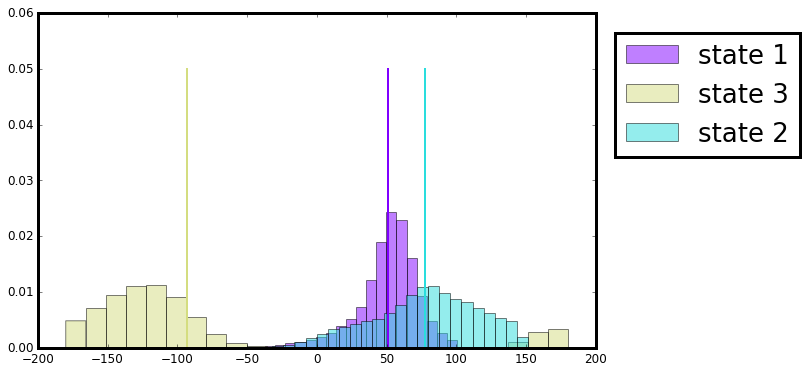

In [84]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.05,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [85]:
# remove symmetrically identical states

In [86]:
microstates_renum2 = deepcopy(microstates_renum)
# microstates_renum2[np.where(microstates_renum2==3)[0]] = 2
# microstates_renum2[np.where(microstates_renum2==4)[0]] = 3
# microstates_renum2[np.where(microstates_renum2==5)[0]] = 4
# microstates_renum2[np.where(microstates_renum2==6)[0]] = 4

In [87]:
np.savetxt('microstates_renum2_3state.dat',microstates_renum2.astype(int),fmt='%d')

In [88]:
for state in range(np.unique(microstates_renum2).shape[0]):
    print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_renum2==state)[0]))/len(microstates_renum2))

state 0 has pop 0.167432651347
state 1 has pop 0.57404851903
state 2 has pop 0.258518829623


In [89]:
N_clust = np.unique(microstates_renum2).shape[0]
N_feat = dtraj.shape[1]
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates_renum2)):
    state_frs = np.where(microstates_renum2==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

In [90]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

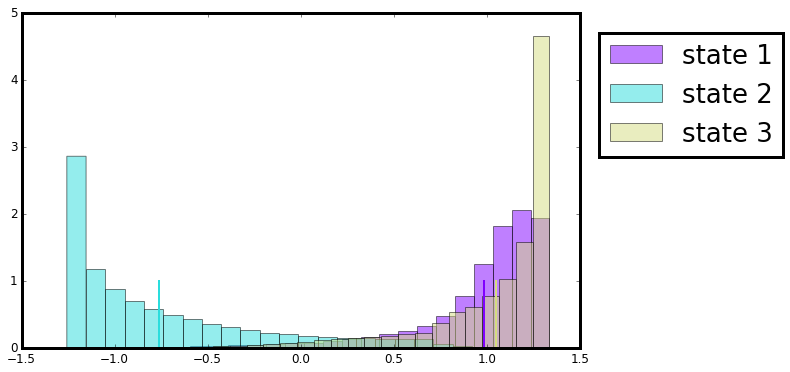

In [91]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [92]:
# everything by hand for Figs
feat_ind = 2
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [93]:
# Now, let's combine states directly from these definitions

In [94]:
# state_pos = np.array(state_pos)

In [95]:
# microstates_2states = deepcopy(microstates_renum2)
# microstates_2states[np.where(microstates_renum2==2)[0]] = 1
# microstates_2states[np.where(microstates_renum2==3)[0]] = 0
# np.savetxt('microstates_2states.dat',microstates_2states.astype(int),fmt='%d')

In [96]:
# for state in range(np.unique(microstates_2states).shape[0]):
#     print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_2states==state)[0]))/len(microstates_2states))

In [97]:
# Now the 2-state rep
cut = 0.900
microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#microstates = np.genfromtxt('microstates')

In [98]:
clust_num_OLD = np.unique(microstates).astype(int)
clust_num_OLD

array([1, 7])

In [99]:
from copy import deepcopy
microstates_renum = deepcopy(microstates)
for state_ind,state in enumerate(clust_num_OLD):
    states = np.where(microstates==state)[0]
    microstates_renum[states] = state_ind

In [100]:
np.savetxt('mpp_traj_'+"{0:.3f}".format(cut)+'_renum.dat',microstates_renum.astype(int),fmt='%d')
#np.savetxt('microstates_renum.dat',microstates_renum.astype(int),fmt='%d')

In [101]:
np.unique(microstates_renum)

array([0., 1.])

In [102]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [103]:
#! dtraj is already shifted
# from copy import deepcopy
# dtraj_shift = deepcopy(dtraj)
# for traj in range(len(dtraj)):
#     dtraj_shift[traj] = (dtraj[traj]-mu)/sd
dtraj_coord = np.load('dtraj_OG.npy')
dtraj_coord_14 = np.load('../DPCA_w14/dtraj_OG.npy')

In [104]:
dtraj_coord_14.shape

(500010, 3)

In [105]:
mu_state = []
mu_state_coord = []
sd_state = []
sd_state_coord = []
for state in np.unique(microstates_renum).astype(int):
    state_frs = np.where(microstates_renum==state)[0]
    mu_state.append(np.mean(dtraj[state_frs],axis=0))
    sd_state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
    mu_state_coord.append([])
    sd_state_coord.append([])
    for dim in range(3):
        if (dim==1): # need to apply minimum image convention
            mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
            d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
            dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
            dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
            dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
            dtraj_dih_min = np.zeros(len(state_frs))
            dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
            for fr in range(len(state_frs)):
                dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
            mu_state_coord[state].append(np.mean(dtraj_dih_min)) 
            sd_state_coord[state].append(np.sqrt(np.var(dtraj_dih_min)))
        else:
            mu_state_coord[state].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
            sd_state_coord[state].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

In [114]:
# testing
# state_frs = np.where(microstates_renum==1)[0]
# plt.hist(dtraj_coord_14[state_frs][:,1])
# mu_tmp = np.mean(dtraj_coord_14[state_frs][:,1])
# d0 = (dtraj_coord_14[state_frs][:,1]-mu_tmp)**2
# dp = (dtraj_coord_14[state_frs][:,1]-mu_tmp+360.)**2
# dm = (dtraj_coord_14[state_frs][:,1]-mu_tmp-360.)**2
# dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
# dtraj_dih_min = np.zeros(len(state_frs))
# dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,1],dtraj_coord_14[state_frs][:,1]+360,dtraj_coord_14[state_frs][:,1]-360))
# for fr in range(len(state_frs)):
#     dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
# plt.hist(dtraj_dih_min)

print sd_state_coord

[[9.586873912643222, 35.37691991277567, 0.12735359995327028], [9.775811718973676, 35.40042519646653, 0.060525614634638195]]


(array([6.11000e+02, 1.50960e+04, 4.47320e+04, 9.57570e+04, 1.00551e+05,
        2.84450e+04, 1.82800e+03, 9.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-266.692 , -231.3447, -195.9974, -160.6501, -125.3028,  -89.9555,
         -54.6082,  -19.2609,   16.0864,   51.4337,   86.781 ]),
 <a list of 10 Patch objects>)

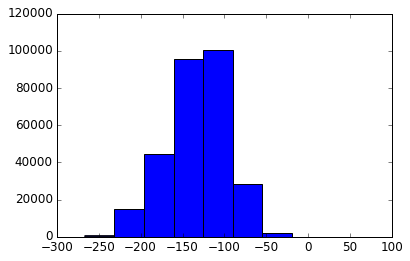

In [107]:
plt.hist(dtraj_dih_min)

In [108]:
np.savetxt('mu_state_2state.txt',mu_state,fmt='%f')
np.savetxt('sd_state_2state.txt',sd_state,fmt='%f')
np.savetxt('mu_state_coord_2state.txt',mu_state_coord,fmt='%f')
np.savetxt('sd_state_coord_2state.txt',sd_state_coord,fmt='%f')

In [109]:
# # let's calc specifically for the 2-state model
# mu_state_2state = []
# sd_state_2state = []
# mu_state_coord_2state = []
# sd_state_coord_2state = []
# # state0 => 0 or 3
# state_frs = np.where(microstates_renum==0)[0]
# state_frs = np.hstack((state_frs,np.where(microstates_renum==3)[0]))
# mu_state_2state.append(np.mean(dtraj[state_frs],axis=0))
# sd_state_2state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
# mu_state_coord_2state.append([])
# sd_state_coord_2state.append([])
# for dim in range(3):
#     if (dim==1): # need to apply minimum image convention
#         mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
#         d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
#         dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
#         dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
#         dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
#         dtraj_dih_min = np.zeros(len(state_frs))
#         dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
#         for fr in range(len(state_frs)):
#             dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
#         mu_state_coord_2state[0].append(np.mean(dtraj_dih_min)) 
#         sd_state_coord_2state[0].append(np.sqrt(np.var(dtraj_dih_min)))
#     else:
#         mu_state_coord_2state[0].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
#         sd_state_coord_2state[0].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

# # state0 => 1 or 2
# state_frs = np.where(microstates_renum==1)[0]
# state_frs = np.hstack((state_frs,np.where(microstates_renum==2)[0]))
# mu_state_2state.append(np.mean(dtraj[state_frs],axis=0))
# sd_state_2state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))
# mu_state_coord_2state.append([])
# sd_state_coord_2state.append([])
# for dim in range(3):
#     if (dim==1): # need to apply minimum image convention
#         mu_tmp = np.mean(dtraj_coord_14[state_frs][:,dim])
#         d0 = (dtraj_coord_14[state_frs][:,dim]-mu_tmp)**2
#         dp = (dtraj_coord_14[state_frs][:,dim]-mu_tmp+360.)**2
#         dm = (dtraj_coord_14[state_frs][:,dim]-mu_tmp-360.)**2
#         dtraj_dih_min_arg = np.argmin( np.array([d0,dp,dm]),axis=0 )
#         dtraj_dih_min = np.zeros(len(state_frs))
#         dtraj_comb = np.vstack((dtraj_coord_14[state_frs][:,dim],dtraj_coord_14[state_frs][:,dim]+360,dtraj_coord_14[state_frs][:,dim]-360))
#         for fr in range(len(state_frs)):
#             dtraj_dih_min[fr] = dtraj_comb[dtraj_dih_min_arg[fr],fr]
#         mu_state_coord_2state[1].append(np.mean(dtraj_dih_min)) 
#         sd_state_coord_2state[1].append(np.sqrt(np.var(dtraj_dih_min)))
#     else:
#         mu_state_coord_2state[1].append(np.mean(dtraj_coord_14[state_frs][:,dim])) 
#         sd_state_coord_2state[1].append(np.sqrt(np.var(dtraj_coord_14[state_frs][:,dim])))

In [110]:
# np.savetxt('mu_state_2state.txt',mu_state_2state,fmt='%f')
# np.savetxt('sd_state_2state.txt',sd_state_2state,fmt='%f')
# np.savetxt('mu_state_coord_2state.txt',mu_state_coord_2state,fmt='%f')
# np.savetxt('sd_state_coord_2state.txt',sd_state_coord_2state,fmt='%f')

In [111]:
N_clust = len(np.unique(microstates_renum))

In [110]:
# let's use the original trajectory
dtraj_OG = np.load('dtraj_OG.npy')
N_feat = dtraj_OG.shape[1]
print N_feat
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates)):
    state_frs = np.where(microstates==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj_OG[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

2


In [111]:
# sort the clusters in order of the first TICA component
import operator
state_pos = []
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    state_pos.append( np.mean( dtraj[:,0][state_frames] ) )

state_prop = []
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_prop.append([])
    state_prop[state_ind].append(state_pos[state_ind])
    state_prop[state_ind].append(state_ind)
sorted_list = sorted(state_prop, key=operator.itemgetter(0), reverse=False)
state_map = np.array(sorted_list)[:,-1].astype(int)
state_map_r = np.zeros(state_map.shape[0]).astype(int)
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_map_r[state_ind] = np.where(state_map==state_ind)[0]
# models = np.array(models)[model_map]
# model_nm = np.array(model_nm)[model_map]
# models_float = np.array(models_float)[model_map]
# print models
# print model_nm
# print models_float
#models_float
print state_map_r
np.save('state_map_r_2state',state_map_r)
np.save('state_map_2state',state_map)

[0 1]


In [112]:
# define the color schemes for the mss_sets
from matplotlib.pyplot import *
mycmap = plt.cm.rainbow
mss_colors = []
mycmap_max = N_clust
mycmap_min = 0
# extract all colors from the map
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
# create the new map
mycmap = mycmap.from_list('Custom cmap', mycmaplist, mycmap.N)
# define the bins and normalize
bounds = np.linspace(mycmap_min,mycmap_max,mycmap.N)
norm = matplotlib.colors.BoundaryNorm(bounds, mycmap.N)
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
dx = bounds[1] - bounds[0]
mss_colors = []
for state in range(N_clust):
    grid = int( (state - mycmap_min)/dx + 0.5 )
    mss_colors.append(mycmaplist[grid])

In [113]:
# print 'cut is '+str(cut)
microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#microstates = np.genfromtxt('microstates')
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

nclust = 2


In [114]:
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state_map_r[state]],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state_map_r[state]+1, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

nclust = 2


In [115]:
np.save('state_pos_2state',state_pos)
np.save('state_colors_2state',mss_colors)

In [116]:
state_pos = np.array(state_pos)

In [117]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [118]:
state_pos[:,0]

array([-0.70656975,  1.02532285,  0.81862445])

In [119]:
#state_pos*sd
dihs = np.zeros(state_pos.shape[1])
import math
for state in range(state_pos.shape[1]):
    pos_OG = state_pos[:,state]*sd + mu
    print pos_OG
    dihs[state] = math.atan2(pos_OG[1],pos_OG[2])
    print dihs

[102.08117817   0.75940655   0.32455916]
[1.16690708 0.        ]
[117.12201104  -0.61717666  -0.54760433]
[ 1.16690708 -2.29653541]


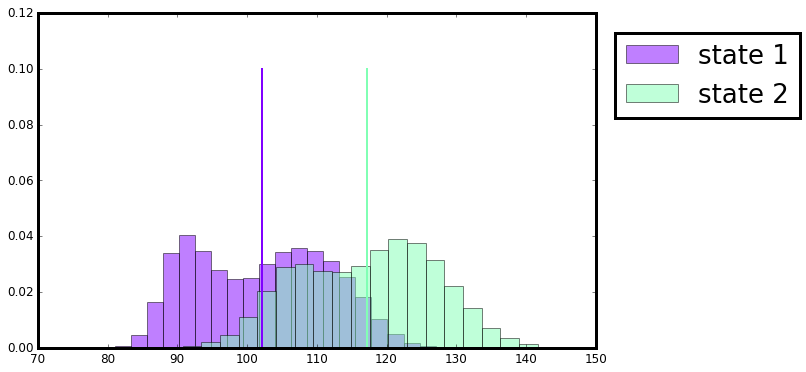

In [120]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.1,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

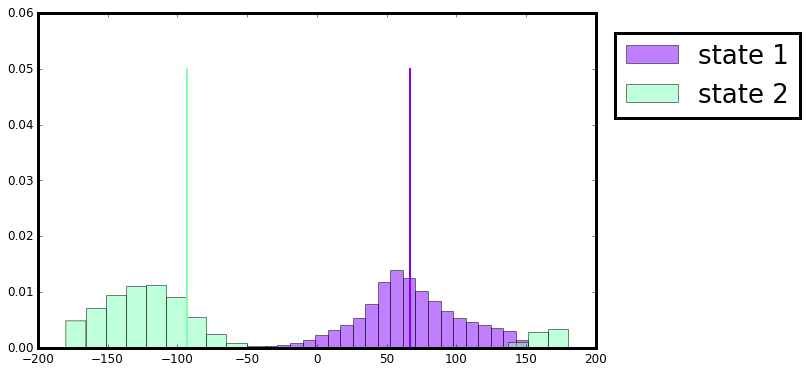

In [121]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.05,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [122]:
# remove symmetrically identical states

In [123]:
microstates_renum2 = deepcopy(microstates_renum)
# microstates_renum2[np.where(microstates_renum2==3)[0]] = 2
# microstates_renum2[np.where(microstates_renum2==4)[0]] = 3
# microstates_renum2[np.where(microstates_renum2==5)[0]] = 4
# microstates_renum2[np.where(microstates_renum2==6)[0]] = 4

In [124]:
np.savetxt('microstates_renum2_2state.dat',microstates_renum2.astype(int),fmt='%d')

In [125]:
for state in range(np.unique(microstates_renum2).shape[0]):
    print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_renum2==state)[0]))/len(microstates_renum2))

state 0 has pop 0.42595148097
state 1 has pop 0.57404851903


In [126]:
N_clust = np.unique(microstates_renum2).shape[0]
N_feat = dtraj.shape[1]
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates_renum2)):
    state_frs = np.where(microstates_renum2==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

In [127]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [128]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

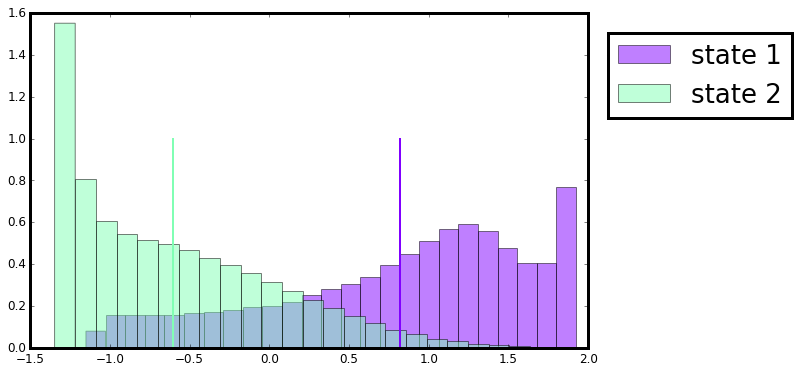

In [129]:
# everything by hand for Figs
feat_ind = 2
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [130]:
# Now, let's combine states directly from these definitions

In [131]:
# state_pos = np.array(state_pos)

In [132]:
# microstates_2states = deepcopy(microstates_renum2)
# microstates_2states[np.where(microstates_renum2==2)[0]] = 1
# microstates_2states[np.where(microstates_renum2==3)[0]] = 0
# np.savetxt('microstates_2states.dat',microstates_2states.astype(int),fmt='%d')

In [133]:
# for state in range(np.unique(microstates_2states).shape[0]):
#     print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_2states==state)[0]))/len(microstates_2states))